Load Glutamatergic Data

In [4]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
from bbknn import bbknn
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Allen/"
adata = sc.read_h5ad(data_path + "glut.h5ad")

c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Analyze Glutamatergic Cells

In [5]:
del adata.uns
del adata.obsm
del adata.varm
del adata.obsp
adata.X = adata.raw.X
adata

AnnData object with n_obs × n_vars = 80042 × 18827
    obs: 'batch', 'class', 'n_genes', 'n_counts', 'leiden', 'doublet', 'doublet_score'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:15)


2023-05-02 09:30:34,836 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-02 09:30:56,393 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-02 09:30:56,982 - harmonypy - INFO - Iteration 1 of 10
2023-05-02 09:31:43,065 - harmonypy - INFO - Iteration 2 of 10
2023-05-02 09:32:29,152 - harmonypy - INFO - Iteration 3 of 10
2023-05-02 09:33:15,238 - harmonypy - INFO - Converged after 3 iterations


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:40)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:06)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


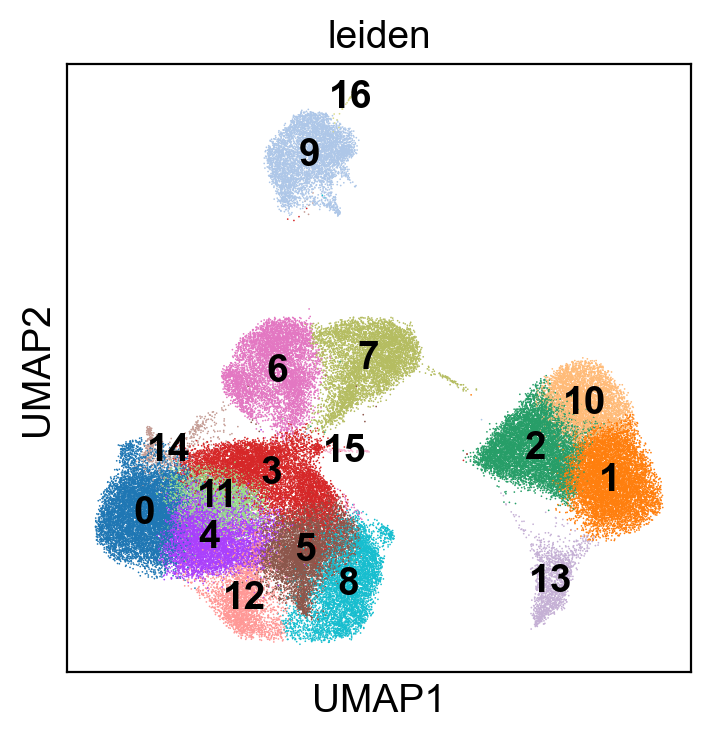

In [7]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch")
sc.pp.neighbors(adata, n_neighbors=25, use_rep='X_pca_harmony')
# sc.pp.neighbors(adata_glut, n_neighbors=25, n_pcs=40)
# bbknn(adata, batch_key="batch", neighbors_within_batch=6)
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


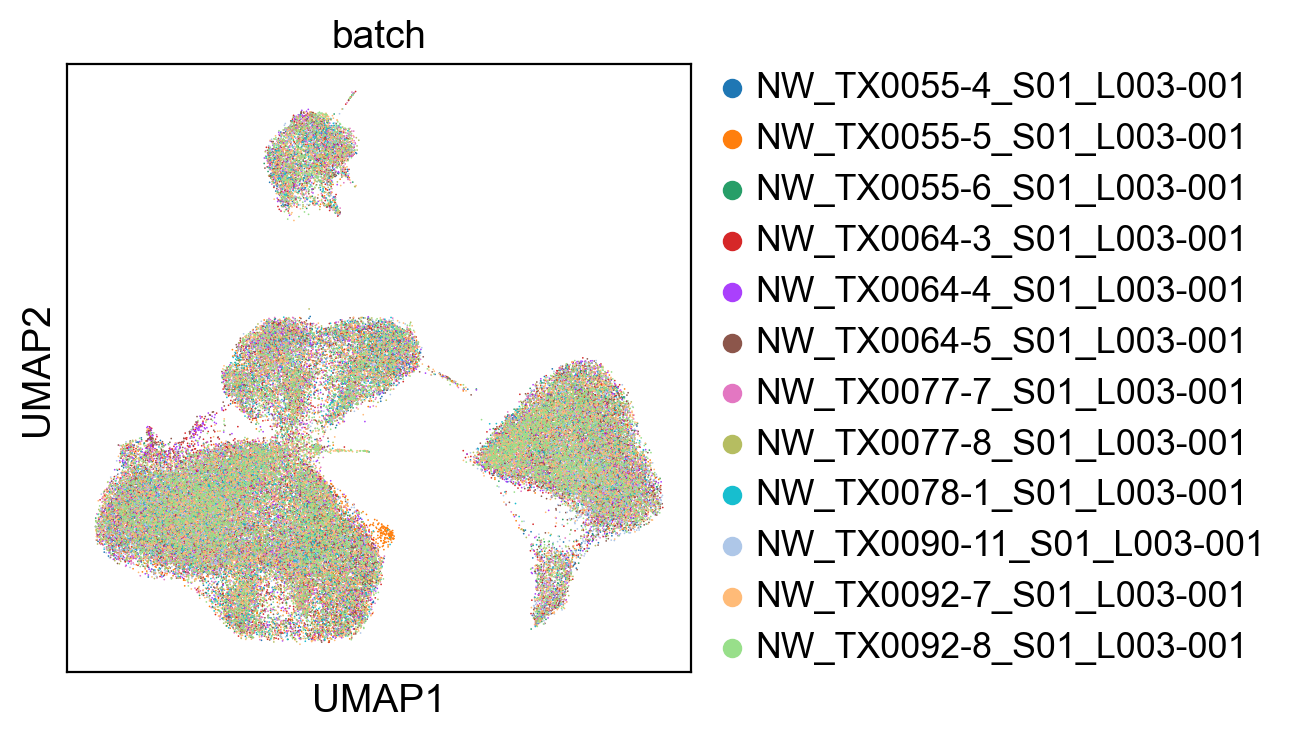

In [10]:
sc.pl.umap(adata, color=["batch"])
adata.obs["subclass"] = [None] * adata.shape[0]

categories: 0, 1, 2, etc.
var_group_labels: General


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


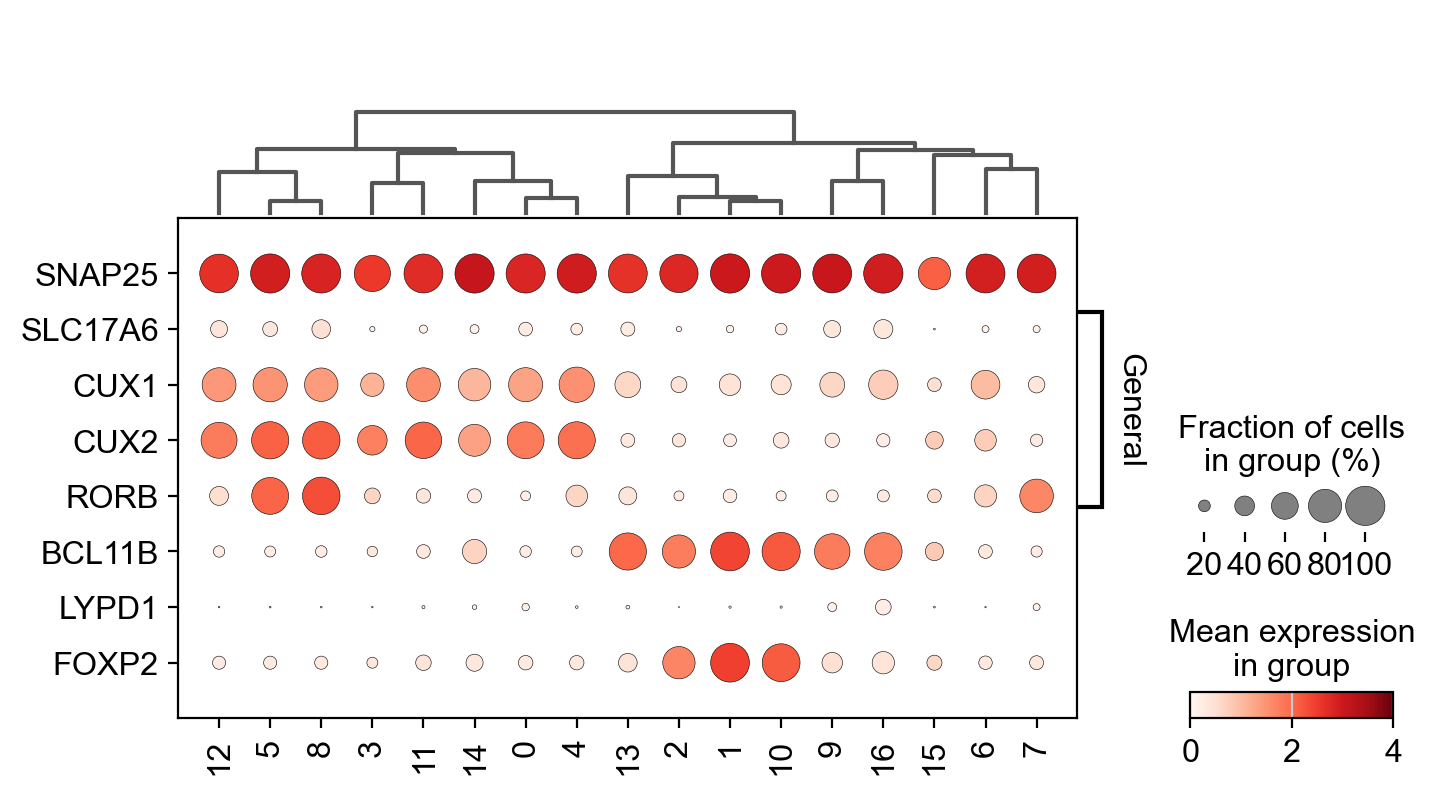

In [26]:
glutamatergic_markers = [
                         "SNAP25", "SLC17A6", # general
                         "CUX1", "CUX2", # L2/3
                         "RORB", # L4
                         "BCL11B", "LYPD1", # L5
                         "FOXP2", # L6
                        ]

sc.pl.dotplot(
    adata, 
    glutamatergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    swap_axes=True, 
    vmin=0, vmax=4, 
    var_group_positions=[(0, 1), ()], 
    var_group_labels=["General"]
            )